# --Real Estate Price Prediction Model--

In [201]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [202]:
df1= pd.read_csv(r"D:\PYTHON\Code basic\PROJECT(banglore_home_prices_final)\House_prices.csv")
df1.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [203]:
df1.shape

(13320, 9)

In [204]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [205]:
df1.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [207]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Data Cleaning: 

**Drop features that are not needed + Handle NA values + drop duplicates **

In [208]:
df1.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [209]:
df2=df1.drop(['area_type','society','availability','balcony'],axis='columns')
df2.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [210]:
df2.shape

(13320, 5)

In [211]:
df3=df2.drop_duplicates()
df3.shape

(12438, 5)

In [212]:
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath          72
price          0
dtype: int64

In [213]:
df4=df3.dropna()
df4.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [214]:
df4.shape

(12365, 5)

#### Feature Engineering

In [215]:
df4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [216]:
df4['bhk']=df4['size'].apply(lambda x : int(x.split(' ')[0]))
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [217]:
df4['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [218]:
df4[df4['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [219]:
df4['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [220]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [221]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [222]:
df4[~df4['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Convert the range to average of Max and Min
##### Drop field such as 34.46Sq. 

In [223]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [224]:
df5=df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [225]:
df4.loc[50]

location      Adarsh Nagar
size                 2 BHK
total_sqft            1270
bath                   2.0
price                 50.0
bhk                      2
Name: 50, dtype: object

In [226]:
df6= df5.copy()
df6['price_per_sqft']=df6['price']*100000/df5['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# df6_stats = df6['price_per_sqft'].describe()
df6_stats

In [227]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6['location'].value_counts(ascending=False)
location_stats

location
Whitefield                           502
Sarjapur  Road                       357
Electronic City                      275
Thanisandra                          225
Kanakpura Road                       217
                                    ... 
Gulakamale                             1
Beml layout, Rajarajeshwari nagar      1
Duddanahalli                           1
Doddanakunte                           1
Jogupalya                              1
Name: count, Length: 1293, dtype: int64

In [228]:
len(location_stats[location_stats.values>10])

231

In [229]:
len(location_stats)

1293

In [230]:
len(location_stats[location_stats<=10])

1062

In [231]:
len(df6.location.unique())

1293

In [232]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                        10
Kalkere                              10
Naganathapura                        10
Dairy Circle                         10
ITPL                                 10
                                     ..
Gulakamale                            1
Beml layout, Rajarajeshwari nagar     1
Duddanahalli                          1
Doddanakunte                          1
Jogupalya                             1
Name: count, Length: 1062, dtype: int64

In [233]:
len(df6.location.unique())

1293

**Any location having less than 10 data points should be tagged as "other" location**

In [234]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

232

In [235]:
df6[df6.location=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13279,other,6 Bedroom,1200.0,5.0,130.00,6,10833.333333
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


**We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors should be removed**

In [236]:
df6[(df6.total_sqft/df6.bhk<300)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13221,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091


In [237]:
df6[(df6.total_sqft/df6.bhk<300)].shape

(729, 7)

In [238]:
df6[~(df6.total_sqft/df6.bhk<300)].shape

(11636, 7)

In [239]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(11636, 7)

In [240]:
df7['price_per_sqft'].describe()

count     11590.000000
mean       6402.285227
std        4273.223109
min         267.829813
25%        4255.319149
50%        5347.150569
75%        7000.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [241]:
mean=np.mean(df7.price_per_sqft)
standard= np.std(df7.price_per_sqft)
# df6[df6.price_per_sqft>(mean-standard) & df6.price_per_sqft<=(mean+standard)]
#len(df6[df6.price_per_sqft>(mean-standard)])
#len(df6[df6.price_per_sqft<=(mean+standard)])
temp1=(df7[df7.price_per_sqft>(mean-standard)])
temp2=(temp1[temp1.price_per_sqft<=(mean+standard)])
df8=temp2

#print( len(df6[df6.price_per_sqft>(mean-standard)])," ", len(df6[df6.price_per_sqft<=(mean+standard)]))
#print (len(temp1) , " " ,len(temp2))
#print (mean," ",standard)

df8.price_per_sqft.describe()

count    10493.000000
mean      5435.230519
std       1709.945773
min       2149.277061
25%       4173.913043
50%       5144.467935
75%       6440.495868
max      10666.666667
Name: price_per_sqft, dtype: float64

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (7,3)

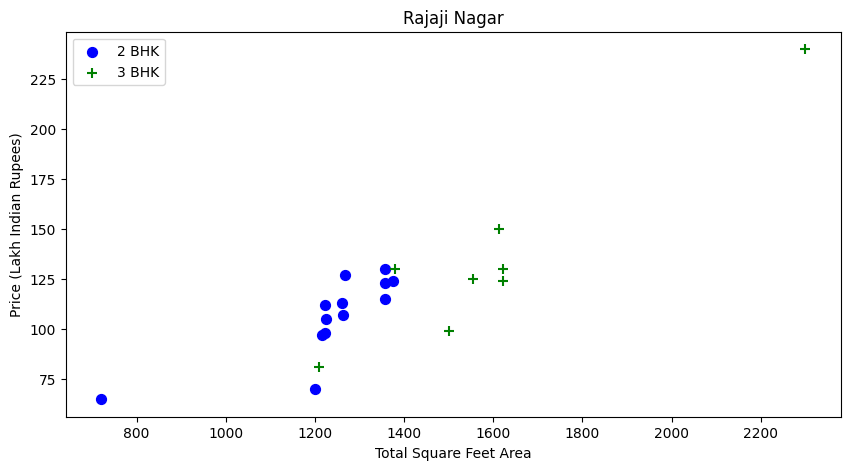

In [243]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

**Condition : you will have total bath = total bed + 1 max.**

In [244]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [245]:
df8[df8.bath>10][['total_sqft','bhk','bath']]

,total_sqft,bhk,bath
3096,12000.0,10,12.0
3609,10000.0,16,16.0
7979,6000.0,11,12.0
8636,4000.0,10,12.0
9935,5425.0,13,13.0


In [246]:
df9 = df8[df8.bath<=df8.bhk+2]
df9.shape

(10489, 7)

**Drop some Columns**

In [247]:
df9 = df8.drop(['price_per_sqft','size'],axis='columns')
df9.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


### Building Model

In [248]:
X=df9.drop(['price'],axis='columns')
y=df9.price


In [249]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [250]:

X['location_n']=le.fit_transform(df9['location'])
df10 = X
X_temp=X.drop(['location','total_sqft','bath','bhk'],axis='columns')
X_temp2=X.drop(['location_n','location'],axis='columns')
X=pd.concat([X_temp,X_temp2],axis='columns')
X


,location_n,total_sqft,bath,bhk
0,75,1056.0,2.0,2
1,57,2600.0,5.0,4
2,216,1440.0,2.0,3
3,154,1521.0,3.0,3
4,146,1200.0,2.0,2
...,...,...,...,...
13312,40,1262.0,2.0,2
13314,83,1715.0,3.0,3
13315,224,3453.0,4.0,5
13317,184,1141.0,2.0,2


In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.02,random_state=50)

In [252]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8137442330058212

In [253]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_model.fit(X_train,y_train)
lasso_model.score(X_test,y_test)

0.810281941606764

In [254]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.813749655529101

In [255]:
X


,location_n,total_sqft,bath,bhk
0,75,1056.0,2.0,2
1,57,2600.0,5.0,4
2,216,1440.0,2.0,3
3,154,1521.0,3.0,3
4,146,1200.0,2.0,2
...,...,...,...,...
13312,40,1262.0,2.0,2
13314,83,1715.0,3.0,3
13315,224,3453.0,4.0,5
13317,184,1141.0,2.0,2


In [256]:
ridge_model.predict([[75,1000,2,2]])

array([51.47520914])

In [257]:
df11=df10[['location_n','location']]
df11=df11.rename(columns={"location_n": "value", "location": "text"})
df11= df11.drop_duplicates()
df12=df11.sort_values("text")
df12.head(2)

,value,text
4991,0,1st Block Jayanagar
936,1,1st Phase JP Nagar


In [258]:
import pickle
with open('D:\\PYTHON\\Code basic\\PROJECT(banglore_home_prices_final)\\House_prices2.pickle','wb') as file:
    pickle.dump(ridge_model,file)

In [259]:
df12.to_json("location.json", orient="records", indent=2)

In [260]:
ridge_model.predict([[0,1000,2,2]])

array([51.20985341])